In [1]:
#Data analysis and wrangling
import pandas as pd
import numpy as np
import IPython
#Visualization
import matplotlib.pyplot as plt
#encoders
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
#Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, plot_roc_curve,plot_confusion_matrix
#pipeline
from sklearn.pipeline import make_pipeline
#machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
path = 'olist_customers_dataset.csv'
customer_df = pd.read_csv(path)


In [3]:
#I ended not using this data frame for it's hcc columns
def wrangle(customer_path):
    customer_df = pd.read_csv(customer_path,
                                  index_col='customer_id')
    customer_df.drop(columns=['customer_unique_id', 'customer_state', 'customer_city'], inplace=True)
    return customer_df
        

    
    
  
     

In [4]:
customer_df = wrangle(path)

In [5]:
customer_df

,customer_zip_code_prefix
customer_id,
06b8999e2fba1a1fbc88172c00ba8bc7,14409
18955e83d337fd6b2def6b18a428ac77,9790
4e7b3e00288586ebd08712fdd0374a03,1151
b2b6027bc5c5109e529d4dc6358b12c3,8775
4f2d8ab171c80ec8364f7c12e35b23ad,13056
...,...
17ddf5dd5d51696bb3d7c6291687be6f,3937
e7b71a9017aa05c9a7fd292d714858e8,6764
5e28dfe12db7fb50a4b2f691faecea5e,60115


In [6]:
#Analyzing the data frame
#customer_df['customer_zip_code_prefix'].value_counts()

In [7]:
#Most frequent city where purchases are made
#customer_df['customer_city'].value_counts(normalize=True)

In [8]:
#customer_df['customer_city'].nunique()

In [9]:
#The target is payment_type, trimming the dataset to help merge the columns together.
#Dropping customer_unique_id since it is not used to link other data.
#customer_df.drop(columns=['customer_unique_id', 'customer_state', 'customer_city'], inplace=True)

In [10]:
#customer_df.isnull().sum()

In [11]:
#geolocation_df = pd.read_csv('olist_geolocation_dataset.csv')#Not needed


In [12]:
# Third data set
path_1 = 'olist_order_items_dataset.csv'
order_products_df = pd.read_csv(path_1)

In [13]:
# Trimming a Hcc column
top_number_of_orders = order_products_df['order_item_id'].value_counts()[:5].index
def top_5(order_quantity):
         if order_quantity in top_number_of_orders:
            return order_quantity
         else:
            return '>5' 

In [14]:
#Applying cleaning to the data
def wrangle_1(order_products_path):
    order_products_df = pd.read_csv(path_1, index_col='product_id')
    
    
    order_products_df['order_item_id'] = order_products_df['order_item_id'].apply(top_5)
    order_products_df = order_products_df[order_products_df.order_item_id != '>5']
    order_products_df.drop(columns=['order_item_id', 'seller_id', 'shipping_limit_date'], inplace=True)
   
    return order_products_df
                        

    



In [15]:
order_products_df = wrangle_1(path_1)

In [16]:
#order_products_df.drop(columns=['order_item_id', 'seller_id', 'shipping_limit_date'], inplace=True)

In [17]:
order_products_df

,order_id,price,freight_value
product_id,,,
4244733e06e7ecb4970a6e2683c13e61,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
e5f2d52b802189ee658865ca93d83a8f,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
c777355d18b72b67abbeef9df44fd0fd,000229ec398224ef6ca0657da4fc703e,199.00,17.87
7634da152a4610f1595efa32f14722fc,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
ac6c3623068f30de03045865e4e10089,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
...,...,...,...
4aa6014eceb682077f9dc4bffebc05b0,fffc94f6ce00a00581880bf54a75a037,299.99,43.41
32e07fd915822b0765e448c4dd74c828,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53
72a30483855e2eafc67aee5dc2560482,fffce4705a9662cd70adb13d4a31832d,99.90,16.95


In [18]:
#Frequency of number of items ordered
#order_products_df['order_item_id'].value_counts()

In [19]:
#top_number_of_orders = order_products_df['order_item_id'].value_counts()[:5].index
#top_number_of_orders

In [20]:
# #def top_5(order_quantity):
#     if order_quantity in top_number_of_orders:
#         return order_quantity
#     else:
#         return '>5' 
    

In [21]:
#order_products_df['order_item_id'] = order_products_df['order_item_id'].apply(top_5)

In [22]:
#Getting rid of rows with >5 number of products ordered
#order_products_df = order_products_df[order_products_df.order_item_id != '>5']


In [23]:
#order_products_df.drop('seller_id', axis=1, inplace=True)
#order_products_df.isnull().sum()

In [24]:
#Fourth dataset
path_2 = 'olist_order_payments_dataset.csv'
order_payments_df = pd.read_csv(path_2)

In [25]:
#Trimming the target column with less hhc values
top_3_payments = order_payments_df['payment_type'].value_counts()[:3].index
def top_3(three_payments):
    if three_payments in top_3_payments:
        return three_payments
    else:
        return 'other'


In [26]:
#Applying data cleaning to the data frame
def wrangle_2(order_payments):
    order_payments_df = pd.read_csv(path_2, index_col='order_id')
    order_payments_df.drop(['payment_sequential'], axis=1, inplace=True)
    order_payments_df['payment_type'] =  order_payments_df['payment_type'].apply(top_3)
    order_payments_df =  order_payments_df[order_payments_df.payment_type != 'other']
    return order_payments_df

In [27]:
order_payments_df = wrangle_2(path_2)

In [28]:
order_payments_df

,payment_type,payment_installments,payment_value
order_id,,,
b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33
a9810da82917af2d9aefd1278f1dcfa0,credit_card,1,24.39
25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1,65.71
ba78997921bbcdc1373bb41e913ab953,credit_card,8,107.78
42fdf880ba16b47b59251dd489d4441a,credit_card,2,128.45
...,...,...,...
0406037ad97740d563a178ecc7a2075c,boleto,1,363.31
7b905861d7c825891d6347454ea7863f,credit_card,2,96.80
32609bbb3dd69b3c066a6860554a77bf,credit_card,1,47.77


In [29]:
#order_payments_df.drop(['payment_sequential'], axis=1, inplace=True)

In [30]:
order_payments_df['payment_installments'].value_counts()

1     51014
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: payment_installments, dtype: int64

In [31]:
order_payments_df['payment_type'].value_counts(normalize=True)


credit_card    0.750288
boleto         0.193290
voucher        0.056422
Name: payment_type, dtype: float64

In [32]:
# top_3_payments = order_payments_df['payment_type'].value_counts()[:3].index
# top_3_payments

In [33]:

# def top_3(three_payments):
#     if three_payments in top_3_payments:
#         return three_payments
#     else:
#         return 'other'


In [34]:
 #order_payments_df['payment_type'] =  order_payments_df['payment_type'].apply(top_3)

In [35]:
# order_payments_df =  order_payments_df[order_payments_df.payment_type != 'other']
    

In [36]:
#order_reviews_df = pd.read_csv('olist_order_reviews_dataset.csv') #not needed

In [37]:
#orders_dataset_df = pd.read_csv('olist_orders_dataset.csv')

In [38]:
#orders_dataset_df #Not needed

In [39]:
path_3 = 'olist_products_dataset.csv'
products_dataset = pd.read_csv(path_3)

In [40]:
## Trimming a Hcc column
top_14_categories = products_dataset['product_category_name'].value_counts()[:14].index
def other(top):
    if top in top_14_categories:
        return top
    else:
        return 'other'

In [41]:
#Applying data cleaning to the data frame
def wrangle_3(products_data):
    products_dataset = pd.read_csv(path_3, index_col='product_id')
    products_dataset.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 
                                   'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'],inplace=True)
    products_dataset['product_category_name'] = products_dataset['product_category_name'].apply(other)
    return products_dataset
    

In [42]:
products_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [43]:
products_dataset = wrangle_3(path_3)

In [44]:
products_dataset

,product_category_name
product_id,
1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
3aa071139cb16b67ca9e5dea641aaa2f,other
96bd76ec8810374ed1b65e291975717f,esporte_lazer
cef67bcfe19066a932b7673e239eb23d,bebes
9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
...,...
a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
bf4538d88321d0fd4412a93c974510e6,other
9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho


In [45]:
pd.set_option('display.max_columns' , 150)   
pd.set_option('display.max_rows' , 150)  

In [46]:
products_dataset['product_category_name'].value_counts(normalize=True) *100
                                                      

other                          26.466572
cama_mesa_banho                 9.192437
esporte_lazer                   8.700798
moveis_decoracao                8.063488
beleza_saude                    7.417074
utilidades_domesticas           7.086280
automotivo                      5.766138
informatica_acessorios          4.974052
brinquedos                      4.282116
relogios_presentes              4.033262
telefonia                       3.441474
bebes                           2.788990
perfumaria                      2.634214
papelaria                       2.576553
fashion_bolsas_e_acessorios     2.576553
Name: product_category_name, dtype: float64

In [47]:
# sellers_df = pd.read_csv('olist_sellers_dataset.csv') #not needed

In [48]:
#products_dataset.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'],inplace=True)


In [49]:
products_dataset

,product_category_name
product_id,
1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
3aa071139cb16b67ca9e5dea641aaa2f,other
96bd76ec8810374ed1b65e291975717f,esporte_lazer
cef67bcfe19066a932b7673e239eb23d,bebes
9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
...,...
a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
bf4538d88321d0fd4412a93c974510e6,other
9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho


In [50]:
#top_14_categories = products_dataset['product_category_name'].value_counts()[:14].index

In [51]:
top_14_categories

Index(['cama_mesa_banho', 'esporte_lazer', 'moveis_decoracao', 'beleza_saude',
       'utilidades_domesticas', 'automotivo', 'informatica_acessorios',
       'brinquedos', 'relogios_presentes', 'telefonia', 'bebes', 'perfumaria',
       'papelaria', 'fashion_bolsas_e_acessorios'],
      dtype='object')

In [52]:
# def other(top):
#     if top in top_14_categories:
#         return top
#     else:
#         return 'other'

In [53]:
#products_dataset['product_category_name'] = products_dataset['product_category_name'].apply(other)

In [54]:
products_dataset

,product_category_name
product_id,
1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
3aa071139cb16b67ca9e5dea641aaa2f,other
96bd76ec8810374ed1b65e291975717f,esporte_lazer
cef67bcfe19066a932b7673e239eb23d,bebes
9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
...,...
a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
bf4538d88321d0fd4412a93c974510e6,other
9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho


In [55]:
#Start Merging
orders_and_payments_df = pd.merge(order_products_df, products_dataset, on='product_id', how='inner')

In [56]:
orders_and_payments_df

,order_id,price,freight_value,product_category_name
product_id,,,,
4244733e06e7ecb4970a6e2683c13e61,00010242fe8c5a6d1ba2dd792cb16214,58.9,13.29,other
4244733e06e7ecb4970a6e2683c13e61,130898c0987d1801452a8ed92a670612,55.9,17.96,other
4244733e06e7ecb4970a6e2683c13e61,532ed5e14e24ae1f0d735b91524b98b9,64.9,18.33,other
4244733e06e7ecb4970a6e2683c13e61,6f8c31653edb8c83e1a739408b5ff750,58.9,16.17,other
4244733e06e7ecb4970a6e2683c13e61,7d19f4ef4d04461989632411b7e588b9,58.9,13.29,other
...,...,...,...,...
4cc4d02efc8f249c13355147fb44e34d,ffebd80e3291e811c308365936897efd,129.9,51.20,other
b10ecf8e33aaaea419a9fa860ea80fb5,ffee31fb4b5e35c9123608015637c495,99.0,13.52,moveis_decoracao
dd469c03ad67e201bc2179ef077dcd48,fff7c4452f050315db1b3f24d9df5fcd,736.0,20.91,relogios_presentes


In [57]:
final_form_df = pd.merge(orders_and_payments_df, order_payments_df, on='order_id', how='inner')

In [108]:
final_form_df

,order_id,price,freight_value,product_category_name,payment_installments,payment_value,credit_card
0,00010242fe8c5a6d1ba2dd792cb16214,58.9,13.29,other,2,72.19,0
1,130898c0987d1801452a8ed92a670612,55.9,17.96,other,1,73.86,1
2,532ed5e14e24ae1f0d735b91524b98b9,64.9,18.33,other,2,83.23,0
3,6f8c31653edb8c83e1a739408b5ff750,58.9,16.17,other,3,75.07,0
4,7d19f4ef4d04461989632411b7e588b9,58.9,13.29,other,4,72.19,0
...,...,...,...,...,...,...,...
115434,ffebd80e3291e811c308365936897efd,129.9,51.20,other,1,181.10,0
115435,ffee31fb4b5e35c9123608015637c495,99.0,13.52,moveis_decoracao,2,112.52,0
115436,fff7c4452f050315db1b3f24d9df5fcd,736.0,20.91,relogios_presentes,1,756.91,0
115437,fffa82886406ccf10c7b4e35c4ff2788,229.9,44.02,esporte_lazer,7,273.92,0


In [107]:
final_form_df['credit_card'] = (final_form_df['payment_type'] != 'credit_card').astype(int)
final_form_df.drop(columns=['payment_type'], inplace=True)

In [109]:
final_form_df.isnull().sum()

order_id                 0
price                    0
freight_value            0
product_category_name    0
payment_installments     0
payment_value            0
credit_card              0
dtype: int64

In [113]:
#Splitting the data
target = 'credit_card'
X = final_form_df.drop(columns=target)
y = final_form_df[target]
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
#Baseline
print(y_train.value_counts(normalize=True).max())

0.7490335784127946


In [116]:
# RandomForestClassifier(n_estimators=60,
#                            n_jobs=-1,
#                            random_state=42))
# #99 acc
# #81 val acc

In [117]:
#MakeModel
model = make_pipeline(OrdinalEncoder(),
                     SimpleImputer(strategy='mean'),
                     RandomForestClassifier(n_estimators=50,
                                           n_jobs=-1,
                                           random_state=42))

model.fit(X_train, y_train);

In [118]:
print('Training Accuracy:', model.score(X_train, y_train))
print('Validation Accuracy:', model.score(X_val, y_val))

Training Accuracy: 0.9999133739753766
Validation Accuracy: 0.8173076923076923


In [120]:
print(classification_report(y_val, 
                            model.predict(X_val),
                            target_names=['o','1']))

              precision    recall  f1-score   support

           o       0.88      0.88      0.88     17296
           1       0.64      0.62      0.63      5792

    accuracy                           0.82     23088
   macro avg       0.76      0.75      0.76     23088
weighted avg       0.82      0.82      0.82     23088



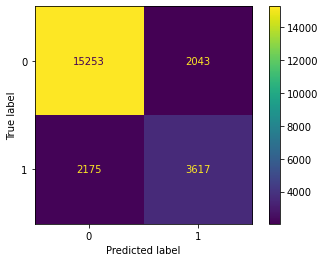

In [122]:
plot_confusion_matrix(
    model,
    X_val, 
    y_val,
    values_format='.0f',
    display_labels=['0','1']
);

In [123]:
#10 most important features in my model
importances = model.named_steps['randomforestclassifier'].feature_importances_
features = model.named_steps['ordinalencoder'].get_feature_names()
feat_imp = pd.Series(importances, index=features).sort_values()

Text(0.5, 0, 'Reduction in Gini Impurity')

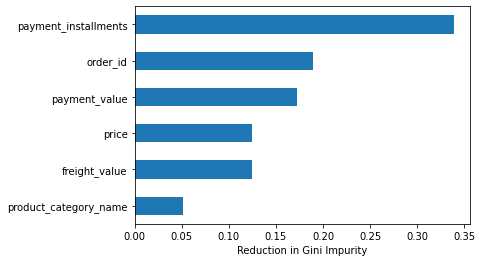

In [124]:
feat_imp.tail(20).plot(kind='barh')
plt.xlabel('Reduction in Gini Impurity')

In [125]:
#XGBoost
from xgboost import XGBClassifier


In [126]:
model_xgb = make_pipeline(OrdinalEncoder(),
                         XGBClassifier(n_estimators=100,
                                      max_depth=10,
                                      learning_rate=1e-3,
                                      n_jobs=10))

In [127]:
model_xgb.fit(X_train, y_train)

c:\users\junio\.virtualenvs\brazilian_ecommerce_site-hnvvf9cu\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:24:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['order_id', 'product_category_name'],
                                mapping=[{'col': 'order_id',
                                          'data_type': dtype('O'),
                                          'mapping': af84f0b808d076913403b036e34b12fa        1
4d6654ead4a57a151e3df6fb20052675        2
637829c452a59980120d8015af137b78        3
bfb1a4b760e9c724cd7e14be83b61b54        4
c642d222512a5f6e0b07d52ae97e8e68        5
                                    ...  
5e605c248def72c23690c44126f8ecb...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.001,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
            

In [128]:
print('training Accuracy', model_xgb.score(X_train, y_train))
print('Validation Accuracy', model_xgb.score(X_val, y_val))

training Accuracy 0.8162228887613562
Validation Accuracy 0.8010221760221761


In [134]:
importances_xgb = model_xgb.named_steps['xgbclassifier'].feature_importances_
features_xgb = model_xgb.named_steps['ordinalencoder'].get_feature_names()
feat_imp_xgb = pd.Series(importances_xgb, index=features_xgb).sort_values()

Text(0.5, 0, 'Reduction in Gini Impurity')

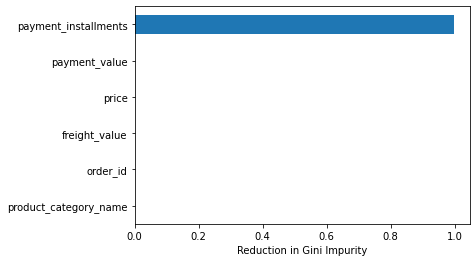

In [135]:
feat_imp_xgb.tail(20).plot(kind='barh')
plt.xlabel('Reduction in Gini Impurity')

In [132]:
print(classification_report(y_val, 
                            model_xgb.predict(X_val),
                            target_names=['0', '1',]))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     17296
           1       0.62      0.52      0.57      5792

    accuracy                           0.80     23088
   macro avg       0.74      0.71      0.72     23088
weighted avg       0.79      0.80      0.80     23088



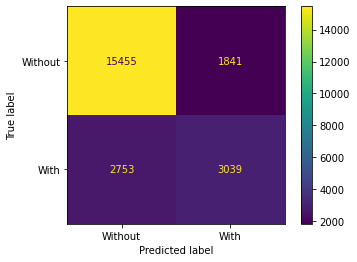

In [136]:
plot_confusion_matrix(
    model_xgb,
    X_val, 
    y_val,
    values_format='.0f',
    display_labels=['Without','With']
);